In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/kaggle/input/back-order-prediction/Back_order_train.csv")

<ipython-input-88-66a5648dccfe>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("/content/drive/MyDrive/kaggle/input/back-order-prediction/Back_order_train.csv")


In [ ]:
df.head(3)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [ ]:
df.shape

(1687861, 23)

In [ ]:
df= df.drop('sku',axis=1)

In [ ]:
df['lead_time'].isnull().sum()/df.shape[0]

0.05977624934754698

In [ ]:
import seaborn as sns

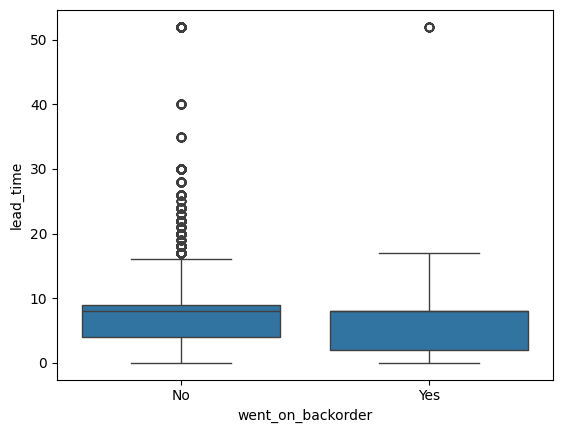

In [ ]:
sns.boxplot(x='went_on_backorder', y='lead_time', data=df)
plt.show()

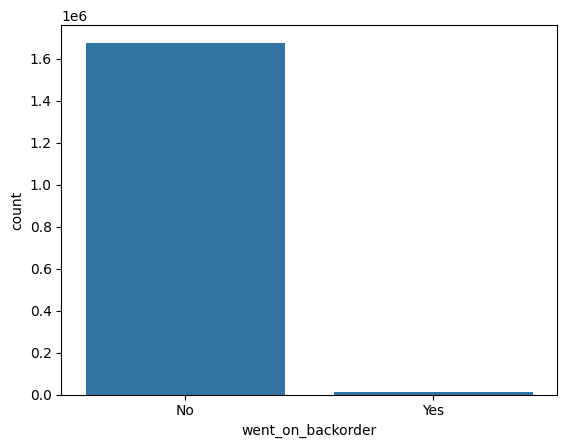

In [ ]:
sns.countplot(x='went_on_backorder', data=df)
plt.show()

Our data is extremely skewed thus we need to handle the imbalance. We will use the SMOTE-Tomek technique

In [ ]:
df1= df.dropna(axis=0)

In [ ]:
df.shape

(1687861, 22)

In [ ]:
df1.shape

(1586967, 22)

In [ ]:
df2= df1.drop_duplicates()

In [ ]:
df2.shape

(979471, 22)

- df: raw dataset
- df1: dropped na
- df2: df1, dropped duplicates

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1586967 entries, 1 to 1687859
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   national_inv       1586967 non-null  float64
 1   lead_time          1586967 non-null  float64
 2   in_transit_qty     1586967 non-null  float64
 3   forecast_3_month   1586967 non-null  float64
 4   forecast_6_month   1586967 non-null  float64
 5   forecast_9_month   1586967 non-null  float64
 6   sales_1_month      1586967 non-null  float64
 7   sales_3_month      1586967 non-null  float64
 8   sales_6_month      1586967 non-null  float64
 9   sales_9_month      1586967 non-null  float64
 10  min_bank           1586967 non-null  float64
 11  potential_issue    1586967 non-null  object 
 12  pieces_past_due    1586967 non-null  float64
 13  perf_6_month_avg   1586967 non-null  float64
 14  perf_12_month_avg  1586967 non-null  float64
 15  local_bo_qty       1586967 non-null  

In [ ]:
numerical_cols= df1.select_dtypes(include=['number']).columns
categorical_cols= df1.select_dtypes(include=['object']).columns

In [ ]:
categorical_cols= ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop']

In [ ]:
len(categorical_cols)

6

In [ ]:
len(numerical_cols), len(categorical_cols)

(15, 6)

In [ ]:
X=df1.drop('went_on_backorder', axis=1)
y=df1["went_on_backorder"]

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(hidden_layer_sizes=(64,32,16,4), verbose = True, max_iter=50))
])

In [ ]:
pipeline.fit(X_train, y_train)

Iteration 1, loss = 0.04069820
Iteration 2, loss = 0.03837548
Iteration 3, loss = 0.03784391
Iteration 4, loss = 0.03732761
Iteration 5, loss = 0.03675086
Iteration 6, loss = 0.03609125
Iteration 7, loss = 0.03587102
Iteration 8, loss = 0.03544428
Iteration 9, loss = 0.03497256
Iteration 10, loss = 0.03485612
Iteration 11, loss = 0.03472741
Iteration 12, loss = 0.03455744
Iteration 13, loss = 0.03433612
Iteration 14, loss = 0.03436347
Iteration 15, loss = 0.03419350
Iteration 16, loss = 0.03420376
Iteration 17, loss = 0.03431962
Iteration 18, loss = 0.03403710
Iteration 19, loss = 0.03393986
Iteration 20, loss = 0.03377519
Iteration 21, loss = 0.03374918
Iteration 22, loss = 0.03381768
Iteration 23, loss = 0.03366643
Iteration 24, loss = 0.03353235
Iteration 25, loss = 0.03357178
Iteration 26, loss = 0.03353471
Iteration 27, loss = 0.03349417
Iteration 28, loss = 0.03337711
Iteration 29, loss = 0.03329870
Iteration 30, loss = 0.03337509
Iteration 31, loss = 0.03316753
Iteration 32, los

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  ['potential_issue',
                                                   'deck_risk', 'oe_constraint',
                                                   'ppap_risk', 'stop_auto_buy',
                                                   'rev_stop'])])),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=(64, 32, 16, 4), max_iter=50,
                               verbose=True))])

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
y_pred= pipeline.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
confusion_matrix(y_train, y_pred)

array([[1260832,      20],
       [   8633,      88]])

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision_score(y_train, y_pred)

0.8148148148148148

In [ ]:
recall_score(y_train, y_pred)